In [125]:


evaluate <- function(inVector, weights) {
    #print(inVector)
    #print(weights)
    inVector <- as.numeric(inVector)
    weights <- as.numeric(weights)
    #print(inVector)
    #print(weights)
    score <- ((inVector[1])*weights[1] + (inVector[2])*weights[2] + (inVector[3])*weights[3]) * weights[4]*(inVector[4]) * (inVector[6]) + inVector[5]*weights[5] + weights[6]
    #print("score")
    #print(score)
    
    return(score)
}


step <- function(inVector, stepSize){
    modVec <- runif(6, -stepSize, stepSize)
    adjVec <- as.numeric(inVector) + as.numeric(modVec)
    return(adjVec)
}

dataSet = read.table('./optimize.csv',sep=',', header=TRUE)

head(dataSet)

testMany <- function(weights){
    total = 0
    for (iter in 1:nrow(dataSet)){
        expec <- evaluate(c(dataSet[iter, 3], dataSet[iter, 4], dataSet[iter, 5], dataSet[iter, 6], dataSet[iter, 8], dataSet[iter, 7]), weights)
        #print("expec")
        #print(expec)
        total <- total + abs(expec - dataSet[iter, 10])
        #print("total")
        #print(total)
    }
    rmsd <- total/nrow(dataSet)
    #print("rmsd")
    #print(rmsd)
    return(rmsd)
}

#iter <- 2
#print(evaluate(c(dataSet[iter, 3], dataSet[iter, 4], dataSet[iter, 5], dataSet[iter, 6], dataSet[iter, 8], dataSet[iter, 7]), c(10, -10, 10, -10, 10)))

,X,word,two,three,four,freq,letAdj,unique,letFreq,score
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,manly,1.3453627,0.34230453,0.023127605,0.005,-0.03121035,5,-0.03121035,4.34
2,2,molar,1.3980539,0.37733783,0.038456367,0.005,0.15674120,5,0.15674120,4.14
3,3,havoc,0.4933752,0.04570751,0.002016942,0.005,-0.02914692,5,-0.02914692,4.40
4,4,impel,0.7906757,0.21457896,0.042490251,0.005,0.28827982,5,0.28827982,4.15
5,5,condo,1.4388890,0.54319861,0.051095872,0.005,0.06495981,4,0.06495981,4.45
6,6,judge,0.2727380,0.06659976,0.020438349,0.008,-0.65066826,5,-0.65066826,5.18


In [122]:
runData1 <- data.frame(nrow = 50, ncol = 12)

for (j in 1){
oldWeights = c(38.0466061, -20.6470182,  13.7657075,  -2.4559885,  -0.2239529,   5.3505540)
               #166.2959770, -604.9319042, 1071.3528797,   -1.8945425,   -0.1248551,4.7586579)

    #150.350040, -594.918705, 1059.557310, -1.616953,    1.082124,   -1.084539)
    #173.0600286, -593.4348973, 1072.8838124, 0.2616983, -0.4729761, 7.0481785)
    #runif(6, -1000, 1000)
    #Best: 38.0466061, -20.6470182,  13.7657075,  -2.4559885,  -0.2239529,   5.3505540)
    #33.9257863, -21.5723502,  16.9947823,  -1.0816596,  -0.2996918,   5.5653276)
    #29.1328429, -19.5808061,  15.8929831,  -2.7576031,  -0.1766772,   5.0640526)
    #33.7150244, -20.0118215,  14.1887680,   0.6049014,  -0.1496459,   4.8816389)
oldCon = testMany(oldWeights)
newWeights = step(oldWeights, 10)

originalScore <- oldCon
originalWeights <- oldWeights

    for (i in 1:5000){    
    newCon <- testMany(newWeights)

    if (oldCon >= newCon){
        oldWeights = newWeights
        oldCon = newCon
    }

    newWeights = step(oldWeights, 10)

    #if (i%10==0){
    #   write.csv(, "./backup.csv")
    #}
    #print(i)
    #print(oldWeights)
    #print(oldCon)
}

runData1[j, 1] <- originalScore
print("original score")
print(originalScore)

    
runData1[j, 2:7] <- originalWeights
print("original weights")
print(originalWeights)

runData1[j, 8] <- oldCon
print("new score")
print(oldCon)

runData1[j, 9:14] <- oldWeights
print("new weights")
print(oldWeights)
}

#0.3873823
#-33.2394256 101.2242744   4.7256325  75.8656558   2.8731204   0.1655567 3.2215120

#"new score"
#[1] 1.189754
#[1] "new weights"
#[1] -556.4872297 -319.8877713  887.8379248   -0.9327360   -0.4870215
#[6]    5.6437341

#"new score"
#[1] 0.4306863
#[1] "new weights"
#[1] -1.278371e+03  1.443556e+02 -8.001534e+01  8.971241e-02 -1.004646e+00
#[6]  9.385803e+00

#"new score"
#[1] 0.3267734
#[1] "new weights"
#[1]  -79.4247319  296.5144740 -591.1482103    2.7946167   -0.4970353
#[6]    6.7031890



[1] "original score"
[1] 0.327084
[1] "original weights"
[1]  38.0466061 -20.6470182  13.7657075  -2.4559885  -0.2239529   5.3505540
[1] "new score"
[1] 0.327084
[1] "new weights"
[1]  38.0466061 -20.6470182  13.7657075  -2.4559885  -0.2239529   5.3505540


,nrow,ncol,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1069839,38.04661,-20.64702,13.76571,-2.455989,-0.2239529,5.350554,0.1062589,36.89612,-21.96359,13.20353,-2.824137,-0.2701152,5.606855
2,0.1069839,38.04661,-20.64702,13.76571,-2.455989,-0.2239529,5.350554,0.1069839,38.04661,-20.64702,13.76571,-2.455989,-0.2239529,5.350554


ERROR: Error in order(runData$V7, decreasing = TRUE): object 'runData' not found


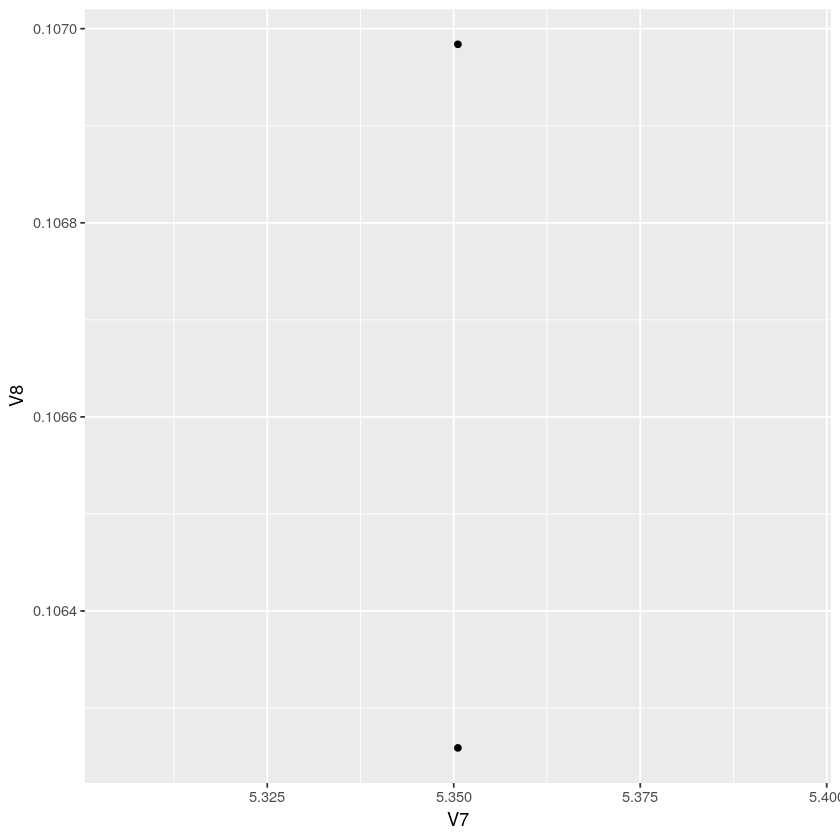

In [38]:
head(runData1)

runData1$time <- 1:nrow(runData1)

library(ggplot2)

p <- ggplot(runData1, aes(x=V7, y = V8))  + geom_point()
print(p)

runData1 <- runData1[order(runData$V7, decreasing = TRUE),]

head(runData1)

bestIn <- c(mean(runData1$V8), mean(runData1$V9), mean(runData1$V10), mean(runData1$V11), mean(runData1$V12))

print(mean(runData1$V8))
print(mean(runData1$V9))
print(mean(runData1$V10))
print(mean(runData1$V11))
print(mean(runData1$V12))

print(testMany(bestIn))

write.csv(runData1, "./backup4.csv")

In [126]:
testModel <- c(38.0466061, -20.6470182,  13.7657075,  -2.4559885,  -0.2239529,   5.3505540)
    #-33.2394256, 101.2242744, 4.7256325, 75.8656558, 2.8731204, 0.1655567, 3.2215120)
    #38.0466061, -20.6470182,  13.7657075,  -2.4559885,  -0.2239529,   5.3505540)
    #33.9257863, -21.5723502,  16.9947823,  -1.0816596,  -0.2996918,   5.5653276)
    #28.9172251, -21.3807068, 13.3508196, -2.2673170, 0.8321637)
    #143.119330, 525.476818, -764.128492, -77.809957, 1.939808)
    #143.4703,917.411542,-830.02854,-0.09537146,-760.4372)
    #22.75964,-20.52704,-64.40652,-9.878941,48.81308)

head(dataSet)

#[['eerie', , , , 0.005, 0]]

manly <- c(1.7350086204860538,0.5282364747741994,0.023262068038187443, .005, 3, 0.273316018)

print(manly)

print(evaluate(manly, testModel))

dataSet$model <- NA

for (i in 1:nrow(dataSet)){
    manly <- c(dataSet[i, 3], dataSet[i, 4], dataSet[i, 5], dataSet[i, 6], dataSet[i, 8], dataSet[i, 7])
    
    #cat(dataSet[i, 2])
    
    #print(evaluate(manly, testModel))
    
    dataSet[i,11] <- evaluate(manly, testModel)
    
    
    }

dataSet$diff <- dataSet$score - dataSet$model


head(dataSet)

#write.csv(dataSet, "./botParameters.csv")
#system("gsutil cp  ./botParameters.csv gs://mcm_2023_data/", intern=TRUE)


,X,word,two,three,four,freq,letAdj,unique,letFreq,score
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,manly,1.3453627,0.34230453,0.023127605,0.005,-0.03121035,5,-0.03121035,4.34
2,2,molar,1.3980539,0.37733783,0.038456367,0.005,0.15674120,5,0.15674120,4.14
3,3,havoc,0.4933752,0.04570751,0.002016942,0.005,-0.02914692,5,-0.02914692,4.40
4,4,impel,0.7906757,0.21457896,0.042490251,0.005,0.28827982,5,0.28827982,4.15
5,5,condo,1.4388890,0.54319861,0.051095872,0.005,0.06495981,4,0.06495981,4.45
6,6,judge,0.2727380,0.06659976,0.020438349,0.008,-0.65066826,5,-0.65066826,5.18


[1] 1.73500862 0.52823647 0.02326207 0.00500000 3.00000000 0.27331602
[1] 4.492672


,X,word,two,three,four,freq,letAdj,unique,letFreq,score,model,diff
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,manly,1.3453627,0.34230453,0.023127605,0.005,-0.03121035,5,-0.03121035,4.34,4.247821,0.092179407
2,2,molar,1.3980539,0.37733783,0.038456367,0.005,0.15674120,5,0.15674120,4.14,4.142385,-0.002385289
3,3,havoc,0.4933752,0.04570751,0.002016942,0.005,-0.02914692,5,-0.02914692,4.40,4.237180,0.162819689
4,4,impel,0.7906757,0.21457896,0.042490251,0.005,0.28827982,5,0.28827982,4.15,4.137909,0.012091113
5,5,condo,1.4388890,0.54319861,0.051095872,0.005,0.06495981,4,0.06495981,4.45,4.419458,0.030542211
6,6,judge,0.2727380,0.06659976,0.020438349,0.008,-0.65066826,5,-0.65066826,5.18,4.349466,0.830533898


Saving 6.67 x 6.67 in image


character(0)

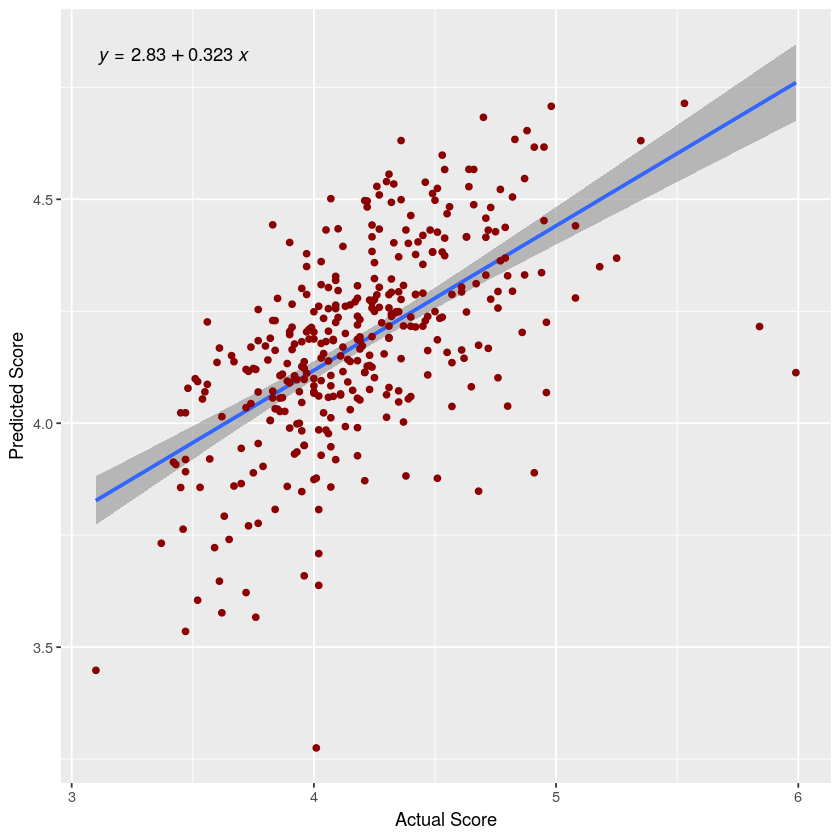

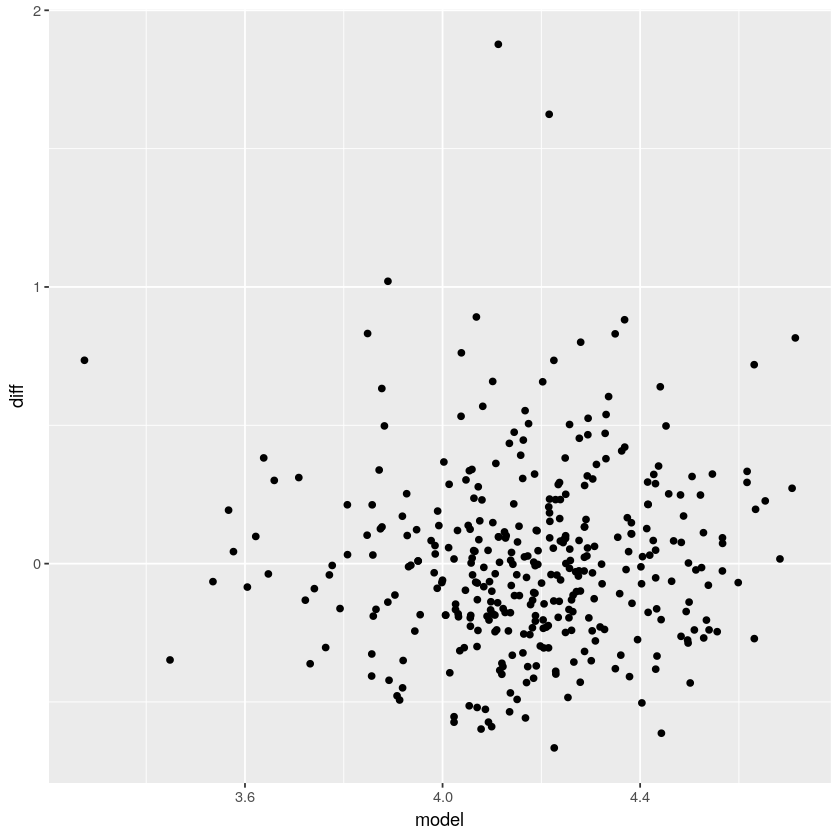

In [127]:
#head(dataSet)



byPred <- dataSet[order(dataSet$model, decreasing = TRUE),]
byReal <- dataSet[order(dataSet$score, decreasing = TRUE),]

#head(byPred,15)
#head(byReal,15)

byPred <- dataSet[order(dataSet$model, decreasing = FALSE),]
byReal <- dataSet[order(dataSet$score, decreasing = FALSE),]

#head(byPred)
#head(byReal)

#install.packages("ggpmisc")
library(ggpmisc)

p <- ggplot(dataSet, aes(x=score, y = model))  +   xlab("Actual Score") + ylab("Predicted Score") + stat_poly_line() +stat_poly_line() + stat_poly_eq(aes(label = after_stat(eq.label))) + geom_point( color = "darkred")
#geom_smooth(method='lm', aes(y=model)) + 
print(p)

ggsave(file="ModelvsScore.png")
system("gsutil cp  ./ModelvsScore.png gs://mcm_2023_data/", intern=TRUE)

p <- ggplot(dataSet, aes(x=model, y=diff))  + geom_point()
print(p)


In [128]:
print(mean(dataSet$model))
print(mean(dataSet$score))
print(sd(dataSet$model))
print(sd(dataSet$score))


[1] 4.180084
[1] 4.19234
[1] 0.2222962
[1] 0.4036552


,X,word,two,three,four,freq,letAdj,unique,letFreq,score,model
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
119,119,inter,2.9574644,1.48891524,0.561247815,0.0070,0.6211279,5,0.6211279,4.01,5.325787
105,105,stick,1.9763350,1.10053827,0.281968536,0.0080,0.5269879,5,0.5269879,3.61,5.103372
286,286,their,0.7463688,0.36283186,0.022724217,0.0095,0.6296597,5,0.6296597,3.47,5.076960
254,254,plant,1.6486148,0.86917252,0.114696786,0.0080,0.5476700,5,0.5476700,3.37,4.996854
83,83,enjoy,0.6262252,0.01414105,0.006185290,0.0090,-0.5696594,5,-0.5696594,4.64,4.971004
247,247,trash,1.3024255,0.53672110,0.025413473,0.0070,0.7003814,5,0.7003814,3.46,4.954914
242,242,train,1.7791502,0.58270231,0.083770338,0.0080,0.7010636,5,0.7010636,3.10,4.910233
165,165,trite,1.9721074,0.90603047,0.098830173,0.0050,0.7980683,4,0.7980683,4.91,4.883160
101,101,saint,1.4953355,0.40999909,0.034153557,0.0070,0.7781173,5,0.7781173,3.62,4.847281


,X,word,two,three,four,freq,letAdj,unique,letFreq,score,model
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
107,107,parer,2.2686049,0.396587903,0.037380664,0.005,0.354002794,4,0.354002794,5.99,3.841888
280,280,nymph,0.4876361,0.119149713,0.038590830,0.005,0.073166035,5,0.073166035,5.84,4.050962
70,70,mummy,0.3025436,0.035489463,0.005109587,0.005,-0.266479318,3,-0.266479318,5.53,3.820227
152,152,coyly,0.7953284,0.011586534,0.000000000,0.005,-0.477947457,4,-0.477947457,5.35,4.306157
257,257,foyer,1.1239461,0.021804580,0.002420331,0.005,-0.264886429,5,-0.264886429,5.25,4.259484
6,6,judge,0.2727380,0.066599763,0.020438349,0.008,-0.650668260,5,-0.650668260,5.18,4.820868
186,186,gawky,0.1566567,0.009853116,0.002016942,0.005,-0.687715530,5,-0.687715530,5.08,4.606242
316,316,swill,0.5849885,0.237113402,0.013177356,0.005,0.064774424,4,0.064774424,5.08,3.892610
179,179,fluff,0.2162679,0.083842715,0.003630496,0.005,-0.360195611,3,-0.360195611,4.98,3.852774


,X,word,two,three,four,freq,letAdj,unique,letFreq,score,model
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
174,174,madam,0.7865190,0.07900739,0.009950249,0.005,0.22946329,3,0.22946329,4.53,3.715906
197,197,cacao,0.6599750,0.09013776,0.002823719,0.005,0.15724862,3,0.15724862,4.83,3.716217
310,310,vivid,0.4750951,0.10081197,0.020976200,0.005,-0.02193303,3,-0.02193303,4.70,3.720436
70,70,mummy,0.3025436,0.03548946,0.005109587,0.005,-0.26647932,3,-0.26647932,5.53,3.820227
18,18,usual,1.2245341,0.08612353,0.011698265,0.007,0.09213546,4,0.09213546,4.24,3.837525
107,107,parer,2.2686049,0.39658790,0.037380664,0.005,0.35400279,4,0.35400279,5.99,3.841888


,X,word,two,three,four,freq,letAdj,unique,letFreq,score,model
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
242,242,train,1.779150,0.5827023,0.08377034,0.008,0.7010636,5,0.7010636,3.10,4.910233
254,254,plant,1.648615,0.8691725,0.11469679,0.008,0.5476700,5,0.5476700,3.37,4.996854
267,267,stair,1.058052,0.3299881,0.01748017,0.005,0.7680910,5,0.7680910,3.42,4.673694
13,13,slate,1.786613,1.0127726,0.20088745,0.005,0.5276786,5,0.5276786,3.43,4.686909
36,36,clean,1.527243,0.2538090,0.03590157,0.008,0.1979429,5,0.1979429,3.45,4.004316
148,148,alien,1.838407,0.4734969,0.02366546,0.007,0.3599523,5,0.3599523,3.45,4.152395


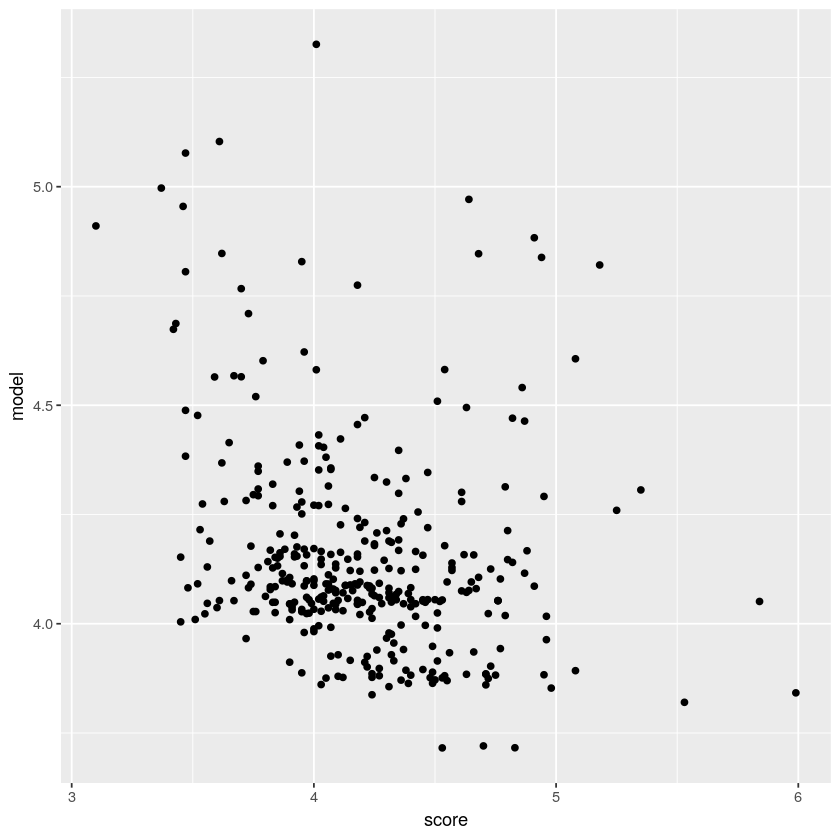

In [18]:
#head(dataSet)



byPred <- dataSet[order(dataSet$model, decreasing = TRUE),]
byReal <- dataSet[order(dataSet$score, decreasing = TRUE),]

head(byPred,15)
head(byReal,15)

byPred <- dataSet[order(dataSet$model, decreasing = FALSE),]
byReal <- dataSet[order(dataSet$score, decreasing = FALSE),]

head(byPred)
head(byReal)

p <- ggplot(dataSet, aes(x=score, y=model))  + geom_point()
print(p)
